# PatternCreator

This is a short notebook to exemplefy the use of the PatternCreator class to make simulated pattern with desired atributes.


In [1]:
%matplotlib inline

#import sys
#sys.path.append("/home/eric/PycharmProjects/PyFDD")
#import pyfdd
from pyfdd.patterncreator import create_detector_mesh
print('PyFDD version', pyfdd.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from IPython.display import display

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

PyFDD version 0.7.1


## Import library


In [2]:
analysis_path = "/home/eric/cernbox/University/CERN-projects/Betapix/Analysis/Channeling_analysis/"
lib_path = os.path.join(analysis_path, "FDD_libraries/GaN_24Na/ue488g20.2dl")
lib = pyfdd.Lib2dl(lib_path)


## Setup detector mesh

In [3]:
n_h_pixels = n_v_pixels = 22*1
pixel_size = 1.3/1 #mm
distance = 315 #mm

xmesh, ymesh = create_detector_mesh(n_h_pixels, n_v_pixels, pixel_size, distance)

## Make and plot pattern


In [4]:
simulations_n = [1]
sub_pixels = 1

pc = pyfdd.PatternCreator(lib, xmesh, ymesh, simulations_n, sub_pixels=sub_pixels, mask_out_of_range=True)

In [9]:
dx = 0
dy = 0
phi = 0
fractions_per_site = 1
total_events = 1e6 #use 1 for p.d.f., ignored if pattern_type = 'yield'
sigma = 0.05
pattern_type = 'yield' # use ideal, yield, montecarlo and poisson

dp = pc.make_datapattern(dx, dy, phi, fractions_per_site, total_events, sigma=sigma, pattern_type=pattern_type)


<IPython.core.display.Javascript object>


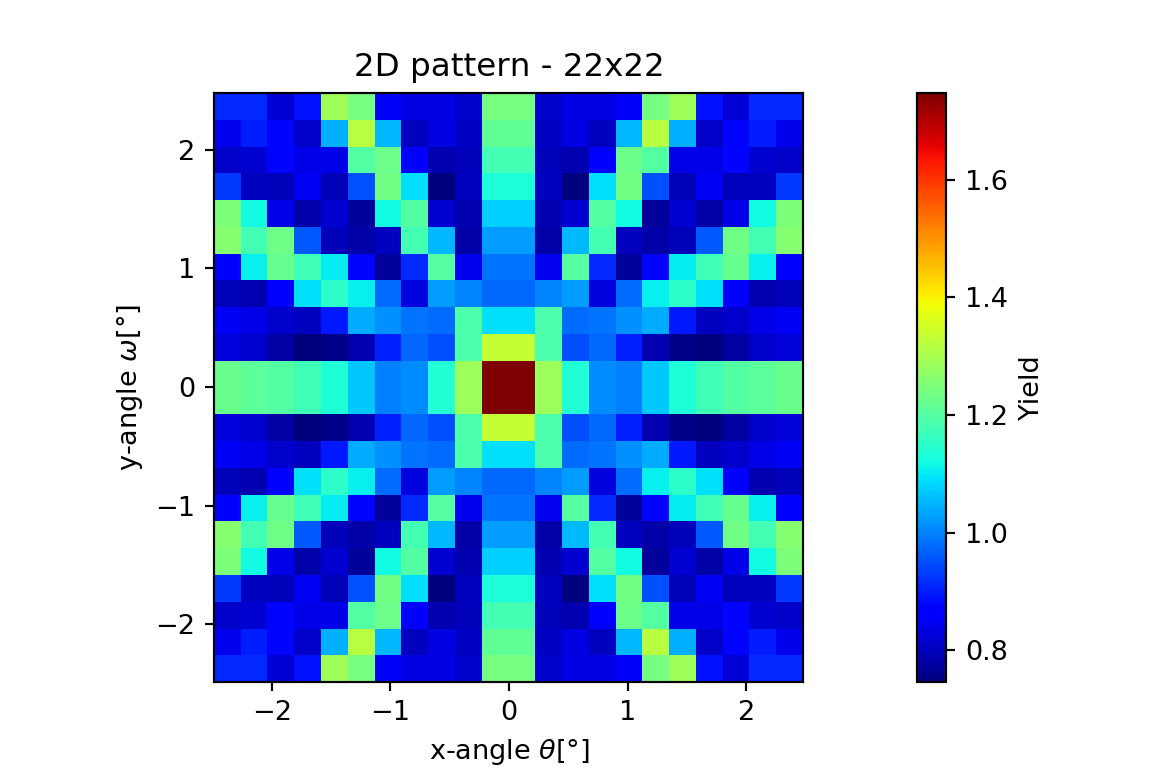

In [10]:
%matplotlib notebook
fg = plt.figure(dpi=150)
ax = fg.add_subplot('111')
dp.draw(ax, percentiles=(0, 1), plot_type='pixels', zlabel='Yield')

## Comparison with original simulation pattern

<IPython.core.display.Javascript object>


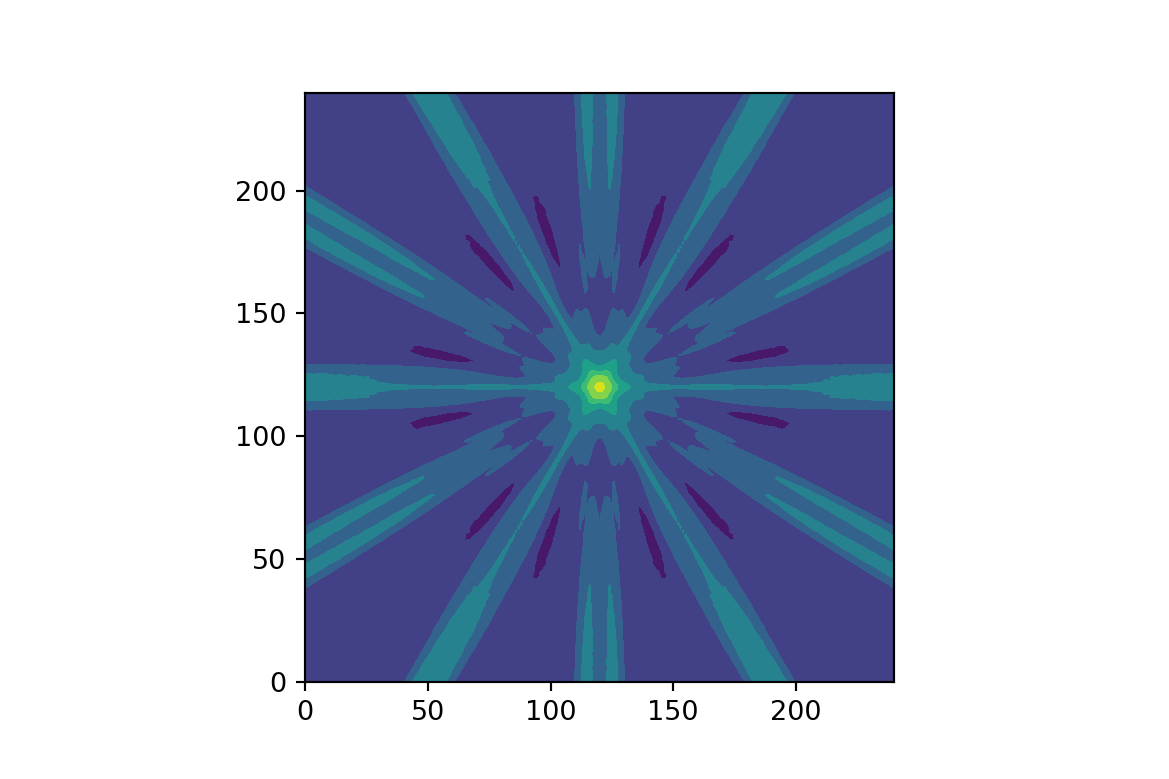

In [8]:
patt_number = 1
imgmat = lib.get_simulation_patt(patt_number)
plt.figure(dpi=150)
plt.contourf(imgmat)
plt.gca().set_aspect('equal')